
# Project: Investigating TMDB Movies
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> first step: Importing libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 21

<a id='wrangling'></a>
## Data Wrangling

> In this section I'm loading the Data and checking general stadistics to decide which actions I need to do to clean and get better quality data.

### Some questions I'd like to answer after this analysis:

- Which genres are most popular from year to year?
- How runtime impact in popularity?
- What kinds of properties are associated with movies that have high revenues?
- How years from release impact revenues?



In [34]:
df = pd.read_csv("tmdb-movies.csv")
display(df.head(5))

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [35]:
print(df.shape)


(10866, 21)


In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [37]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


As we can see, there are many values with 0 budget, revenue, runtime.
I've also seen some values 1, 2, 3, 5 for budget and revenue.
All of that is impossible to happens, so I will delete:
(Budget < 1.000)
(revenue < 1.000)
(runtime = 0)

In [39]:
df.drop(df.loc[df["budget"]<1000].index, inplace=True)
df.drop(df.loc[df["revenue"]<1000].index, inplace=True)
df.drop(df.loc[df["runtime"]==0].index, inplace=True)
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3820.000000,3820.000000,3.820000e+03,3.820000e+03,3820.000000,3820.000000,3820.000000,3820.000000,3.820000e+03,3.820000e+03
mean,39968.198168,1.197872,3.746006e+07,1.086128e+08,109.307853,531.473037,6.170052,2001.280890,4.453979e+07,1.382208e+08
std,67354.717579,1.479861,4.225732e+07,1.770395e+08,19.842229,882.829213,0.794036,11.296889,4.482926e+07,2.166912e+08
min,5.000000,0.001117,6.000000e+03,1.938000e+03,26.000000,10.000000,2.200000,1960.000000,6.310011e+03,1.840604e+03
25%,6071.000000,0.465197,1.000000e+07,1.413532e+07,96.000000,72.000000,5.700000,1995.750000,1.336182e+07,1.910216e+07
50%,11316.000000,0.804415,2.400000e+07,4.586267e+07,106.000000,206.000000,6.200000,2004.000000,3.030653e+07,6.245848e+07
75%,38576.000000,1.380126,5.000000e+07,1.255494e+08,119.000000,583.000000,6.700000,2010.000000,6.076720e+07,1.648108e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


> With this initial querys I can understand more the data, which columns contain the Dataframe, the size of it, null values and other basic statistics.


### Data Cleaning:

> The changes I need to do to get a better database to analyse are:
>1. Delete some columns that have missing values and I don't care so much for my analysis.(Columns:imdb_id,cast,homepage,director,tagline,keywords,overview,production_companies)
>2. I will delete 23 rows with "genres" Null values, I can't replace this with other data (like mean value) so is better to delete and it is just a 0,2% from all my database.
>3. I have to work in "genres" column because it has many different values inside them, and I need to separate them. The steps I'm going to follow are:
    (1) Detect what is the maximun quantity of genres asociated in one movie.
    (2) Create new databases, one per each genre, that duplicate the rest of column values.
    (3) Append all this new databases in a final one.

In [40]:
#Step 1

df.drop(["imdb_id","cast","homepage","director","tagline","keywords","overview","production_companies"], axis=1, inplace=True)
df.dropna()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,396,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,131,Drama,6/21/66,74,7.5,1966,5.038511e+07,2.266436e+08
10828,5780,0.402730,3000000,13000000,Torn Curtain,128,Mystery|Thriller,7/13/66,46,6.3,1966,2.015404e+07,8.733419e+07
10829,6644,0.395668,4653000,6000000,El Dorado,120,Action|Western,12/17/66,36,6.9,1966,3.125892e+07,4.030809e+07
10835,5923,0.299911,12000000,20000000,The Sand Pebbles,182,Action|Adventure|Drama|War|Romance,12/20/66,28,7.0,1966,8.061618e+07,1.343603e+08


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3820 entries, 0 to 10848
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3820 non-null   int64  
 1   popularity      3820 non-null   float64
 2   budget          3820 non-null   int64  
 3   revenue         3820 non-null   int64  
 4   original_title  3820 non-null   object 
 5   runtime         3820 non-null   int64  
 6   genres          3820 non-null   object 
 7   release_date    3820 non-null   object 
 8   vote_count      3820 non-null   int64  
 9   vote_average    3820 non-null   float64
 10  release_year    3820 non-null   int64  
 11  budget_adj      3820 non-null   float64
 12  revenue_adj     3820 non-null   float64
dtypes: float64(4), int64(6), object(3)
memory usage: 577.8+ KB


I got my new database, with just "genres" column with some missing values.
So now I will delete null values from column genres, that are just 23 rows.

In [42]:
df.dropna(inplace=True)
display(df.shape)

(3820, 13)

Now, I have my cleaned dataframe with no null values.
To get stadistics asociated with genres column, first I need to  split each row in how many genres the movie has.
So I need to know how many genres has each movie and get the maximum.

In [43]:
def genres_count(element):
    if "|" in element:
        return element.count("|")+1
    else:
        return 1
    
df["n_genres"] = df["genres"].apply(genres_count)
df.head()
df["n_genres"].max()

5

With 5 as maximum of genres per movie, I will create 5 new dataframes to separate genres and then append one each other.

In [44]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()
df5 = df.copy()

def label(x):
    if x.count("|")+1 == 1:
        y=[0,0,0,0,0]
        y[0:1] = x.split("|")
        return y
    elif x.count("|")+1 == 2:
        y=[0,0,0,0,0]
        y[0:2] = x.split("|")
        return y
    elif x.count("|")+1 == 3:
        y=[0,0,0,0,0]
        y[0:3] = x.split("|")
        return y
    elif x.count("|")+1 == 4:
        y=[0,0,0,0,0]
        y[0:4] = x.split("|")
        return y
    elif x.count("|")+1 == 5:
        y=[0,0,0,0,0]
        y[0:5] = x.split("|")
        return y


def item0(element):
    return element[0]
def item1(element):
    return element[1]
def item2(element):
    return element[2]
def item3(element):
    return element[3]
def item4(element):
    return element[4]


df1["genre"] = df["genres"].apply(label).apply(item0)
df2["genre"] = df["genres"].apply(label).apply(item1)
df3["genre"] = df["genres"].apply(label).apply(item2)
df4["genre"] = df["genres"].apply(label).apply(item3)
df5["genre"] = df["genres"].apply(label).apply(item4)

df_comb = df1.append(df2, ignore_index=True).append(df3, ignore_index=True).append(df4, ignore_index=True).append(df5, ignore_index=True)
df_comb["genre"].value_counts()
#27.255 values in 0, I'll delete them.
df_comb.drop(df_comb.loc[df_comb["genre"]==0].index, inplace=True)

df_comb.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10216 entries, 0 to 19098
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10216 non-null  int64  
 1   popularity      10216 non-null  float64
 2   budget          10216 non-null  int64  
 3   revenue         10216 non-null  int64  
 4   original_title  10216 non-null  object 
 5   runtime         10216 non-null  int64  
 6   genres          10216 non-null  object 
 7   release_date    10216 non-null  object 
 8   vote_count      10216 non-null  int64  
 9   vote_average    10216 non-null  float64
 10  release_year    10216 non-null  int64  
 11  budget_adj      10216 non-null  float64
 12  revenue_adj     10216 non-null  float64
 13  n_genres        10216 non-null  int64  
 14  genre           10216 non-null  object 
dtypes: float64(4), int64(7), object(4)
memory usage: 1.2+ MB


I had to creat 2 functions to finally get my new 5 dataframe.
After that I append one each other, and delete all "0" value in column "genre" because it was just null values from movies that have less quantity of genres than 5.
My new dataset ready to analyse genres statistics has 26960 rows.

Now that I've trimmed and cleaned data, I'm going to answer some relevant questions for analysis.

### 1. Which genres are most popular from year to year?

In [45]:
df_yty = df_comb.groupby(["release_year","genre"], as_index=False)["popularity"].mean()
df_yty

,release_year,genre,popularity
0,1960,Action,1.504538
1,1960,Adventure,1.872132
2,1960,Comedy,0.501564
3,1960,Drama,1.564871
4,1960,History,1.136943
...,...,...,...
837,2015,Romance,2.108030
838,2015,Science Fiction,7.594638
839,2015,Thriller,3.913396
840,2015,War,1.943238


In [46]:
pop_yty = df_yty.iloc[df_yty.groupby("release_year").agg(max_ = ("popularity", lambda data: data.idxmax())).max_]
pop_yty["popularity"].plot()

,release_year,genre,popularity
5,1960,Horror,2.610362
11,1961,Animation,2.631987
27,1962,Thriller,3.170651
31,1963,Adventure,1.586280
40,1964,Action,3.153791
60,1965,Thriller,1.910465
64,1966,Drama,0.485092
73,1967,Animation,2.550704
92,1968,Mystery,1.728887
98,1969,Action,1.778746


In this dataframe we can see the Max popularity for year and the gender it belongs.
Now I'd like to know which genre has won more time the year popularity and how popularity behave during the time.

<AxesSubplot:>

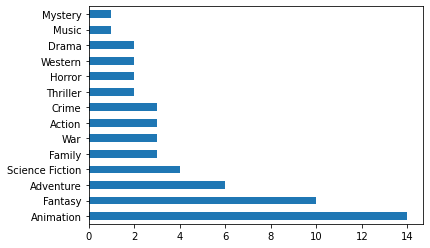

In [52]:
pop_yty["genre"].value_counts()
pop_yty["genre"].value_counts().plot(kind="barh")


<AxesSubplot:ylabel='genre'>

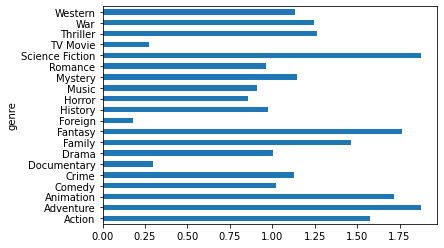

In [94]:
df_comb.groupby(["genre"]).mean()["popularity"].plot(kind="barh")

<AxesSubplot:xlabel='release_year'>

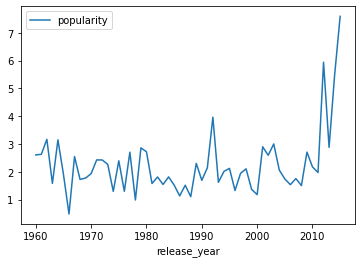

In [77]:
pop_yty.plot(x="release_year", y="popularity")

### 2. How runtime impact in people perception?

<AxesSubplot:title={'center':'SCATTER PLOT BETWEEN VOTE AVERAGE/RUNTIME'}, xlabel='runtime', ylabel='vote_average'>

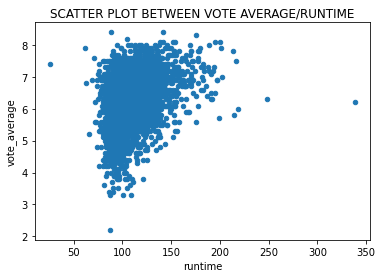

In [76]:
df.plot(x="runtime", y="vote_average", kind="scatter", title="SCATTER PLOT BETWEEN VOTE AVERAGE/RUNTIME")


First I've plotted to see how runtime behave in this sample.
This scatter plot is maked to analyse the correlation between the vote that people give to the movie and the runtime it has.
There is possible to recognise a positive correlation, longer movies (>120) hasn't scores < 5.

### 3. What kinds of properties are associated with movies that have high revenues?


<AxesSubplot:title={'center':'SCATTER PLOT BETWEEN REVENUE/NUMBER OF GENRES'}, xlabel='revenue', ylabel='n_genres'>

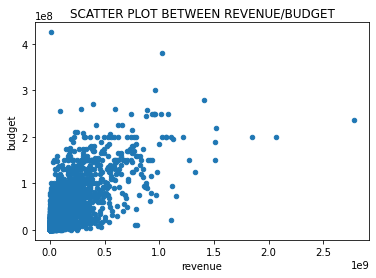

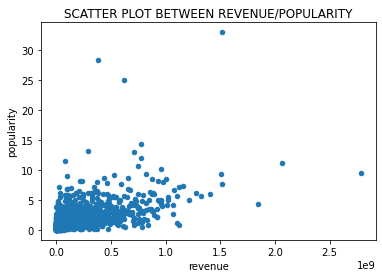

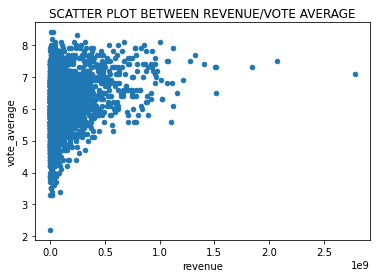

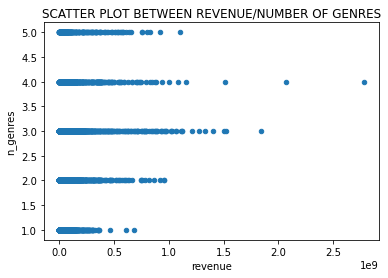

In [49]:
# Now that I need to analyse per movie, I'll take back original batabase cleaned.
df.plot(x="revenue", y="budget", kind="scatter", title="SCATTER PLOT BETWEEN REVENUE/BUDGET")
df.plot(x="revenue", y="popularity", kind="scatter", title="SCATTER PLOT BETWEEN REVENUE/POPULARITY")
df.plot(x="revenue", y="vote_average", kind="scatter", title="SCATTER PLOT BETWEEN REVENUE/VOTE AVERAGE")
df.plot(x="revenue", y="n_genres", kind="scatter", title="SCATTER PLOT BETWEEN REVENUE/NUMBER OF GENRES")


I've analysed 4 variables that could be relevants to revenues from each movie: Budget, popularity, vote average, number of gender.
From budget and revenue we can see a positive correlation, and we can say that budget really care.
From popularity and revenue we also can say that has positive correlation, and it's quite obvious.
From vote average and revenue we can't see a clear correlation, we can also see that movie with high revenues doesn´t have the best vote average.
From number of genders and revenue we can't find a correlation, and we also can realize that movies with 3 genres has the best revenues so is not so smart to give many catergories to one movie.

<AxesSubplot:title={'center':'BUDGET BEHAVIOUR DURING THE TIME'}, xlabel='release_year'>

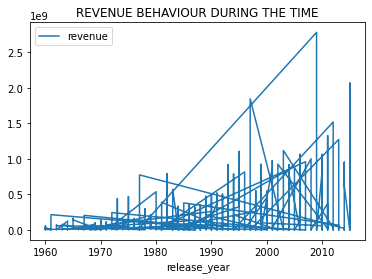

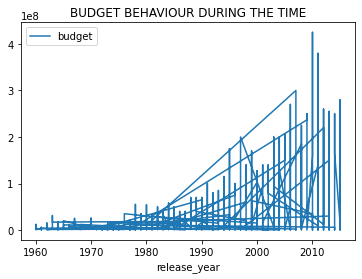

In [75]:
df.plot(x="release_year", y="revenue", title="REVENUE BEHAVIOUR DURING THE TIME")
df.plot(x="release_year", y="budget", title="BUDGET BEHAVIOUR DURING THE TIME")

This this 2 plots I wanted to proof that budget have been increasing during the last years, and revenue as well.
As we have seen in a previous plot popularity have also been inscreasing with the years, all of this 3 variables are positive correlated, that's why we can say that budget have pushed up the other 2 variables.

### 4. How years from release impact in revenues?

<AxesSubplot:xlabel='revenue'>

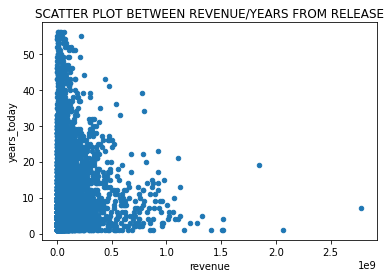

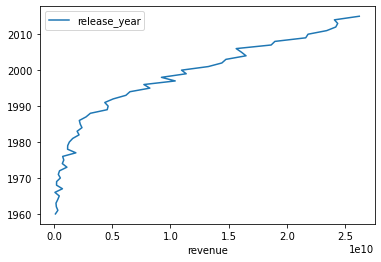

In [78]:
#as the dataset was created in 2016 in Kaggle, I will use this date to analyse.
df["years_today"] = 2016 - df["release_year"]
df.plot(x="revenue", y="years_today", kind="scatter", title="SCATTER PLOT BETWEEN REVENUE/YEARS FROM RELEASE")
df.groupby("release_year", as_index=False)["revenue"].sum().plot("revenue", "release_year")

I finally wanted to analyse if the quantity of years that the movie has since his release really means that revenues are higher (more years to be watched, more money you can earn), but I've discovered that is really doesn't matter and movies with less years has higher revenues.
So I made and line char to see total revenues per releasing year, and we can conclude that the last years movies has higher revenues than befores and the curve is in raise.

<a id='conclusions'></a>
## Conclusions

From the analysis I can conclude:
- We can say that Animation, Fantasy and Adventure are the most popular genres, in this order. Because They have won the N°1 popularity more quantity of years. But if get the mean popularity score per genre, we also can say that Science fiction is also good evaluated.
- Earlier movies has better revenues than before.
- What really impacts in the revenue from a movie, in general, is the budget.
- A movie with good vote score has good revenue, and also a popular one.
- We can say that lower scores belongs to shorter runtime movies.

Limitations for the analysis:
- The dataset had to many null values and dirty data that make it more difficult, and it was mandatory to clean.
- Many columns was useless so were deleted.
- We got great information in the dataset, and with he information given we can say that conclusions are representative.
